In [710]:
import pandas as pd
import numpy as np

In [711]:
train_data = pd.read_csv('train.csv')
train_data.sample(frac=1)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
19118,Tanzania,2017,uniqueid_4316,No,Urban,No,2,45,Female,Spouse,Single/Never Married,Primary education,Self employed
8967,Rwanda,2016,uniqueid_2900,No,Rural,Yes,3,27,Male,Head of Household,Married/Living together,Primary education,Informally employed
12652,Rwanda,2016,uniqueid_6585,No,Urban,Yes,6,17,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
17808,Tanzania,2017,uniqueid_3006,No,Urban,No,2,21,Female,Head of Household,Single/Never Married,Primary education,Self employed
7111,Rwanda,2016,uniqueid_1044,No,Rural,Yes,4,47,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
12164,Rwanda,2016,uniqueid_6097,No,Rural,No,5,62,Female,Spouse,Married/Living together,No formal education,Informally employed
13422,Rwanda,2016,uniqueid_7355,No,Rural,No,7,16,Female,Child,Single/Never Married,Primary education,Remittance Dependent
7089,Rwanda,2016,uniqueid_1022,Yes,Rural,Yes,1,67,Female,Head of Household,Widowed,No formal education,Farming and Fishing
1806,Kenya,2018,uniqueid_1807,No,Urban,Yes,2,70,Female,Head of Household,Widowed,No formal education,Remittance Dependent
1412,Kenya,2018,uniqueid_1413,No,Urban,Yes,1,29,Female,Head of Household,Single/Never Married,Secondary education,Informally employed


In [712]:
train_data.shape

(23524, 13)

In [713]:
columns = train_data.columns

In [714]:
train_data.head(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [715]:
for i in columns:
    exec("print( - len(train_data.%s.unique()))"%i)

-4
-3
-8735
-2
-2
-2
-20
-85
-2
-6
-5
-6
-10


In [716]:
columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [717]:
# countinuous - household_size, age_of_respondent
columns_new = ['uniqueid', 'country', 'year', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'bank_account']

In [718]:
train_data = train_data[columns_new]

In [719]:
for i in columns_new:
    exec("print('-----{}-----'.format(i))")
    exec("print( train_data.%s.value_counts())"%i)

-----uniqueid-----
uniqueid_1115    4
uniqueid_1762    4
uniqueid_719     4
uniqueid_708     4
uniqueid_173     4
                ..
uniqueid_7076    1
uniqueid_8065    1
uniqueid_8356    1
uniqueid_7439    1
uniqueid_7077    1
Name: uniqueid, Length: 8735, dtype: int64
-----country-----
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64
-----year-----
2016    8735
2018    8169
2017    6620
Name: year, dtype: int64
-----location_type-----
Rural    14343
Urban     9181
Name: location_type, dtype: int64
-----cellphone_access-----
Yes    17454
No      6070
Name: cellphone_access, dtype: int64
-----household_size-----
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
18       1
17       1
20       1
21       1
Name: household_size, dtype: int64
-----age_of_respondent-----
30    1056
35     836
25     792
28     748
32    

In [720]:
train_data.head()

,uniqueid,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,uniqueid_1,Kenya,2018,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Yes
1,uniqueid_2,Kenya,2018,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,No
2,uniqueid_3,Kenya,2018,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Yes
3,uniqueid_4,Kenya,2018,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,No
4,uniqueid_5,Kenya,2018,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,No


In [721]:
train_data.dtypes

uniqueid                  object
country                   object
year                       int64
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
bank_account              object
dtype: object

In [722]:
'''# Over-Sampling
count_class_N, count_class_Y = train_data.bank_account.value_counts()
# Divide by class
df_class_N = train_data[train_data['bank_account'] == 'No']
df_class_Y = train_data[train_data['bank_account'] == 'Yes']
df_class_Y_over = df_class_Y.sample(count_class_N-14500, replace=True, random_state=42)
train_data = pd.concat([df_class_N, df_class_Y_over], axis=0)
train_data = train_data.astype(str)
print('Random over-sampling:')
print(train_data.bank_account.value_counts())'''

"# Over-Sampling\ncount_class_N, count_class_Y = train_data.bank_account.value_counts()\n# Divide by class\ndf_class_N = train_data[train_data['bank_account'] == 'No']\ndf_class_Y = train_data[train_data['bank_account'] == 'Yes']\ndf_class_Y_over = df_class_Y.sample(count_class_N-14500, replace=True, random_state=42)\ntrain_data = pd.concat([df_class_N, df_class_Y_over], axis=0)\ntrain_data = train_data.astype(str)\nprint('Random over-sampling:')\nprint(train_data.bank_account.value_counts())"

In [723]:
'''# Under-Sampling
count_class_N, count_class_Y = train_data.bank_account.value_counts()
df_class_N = train_data[train_data['bank_account'] == 'No']
df_class_Y = train_data[train_data['bank_account'] == 'Yes']
df_class_N_under = df_class_N.sample(count_class_Y+9000,random_state=42)
train_data = pd.concat([df_class_Y, df_class_N_under], axis=0)
print('Random Under-sampling:')
print(train_data.bank_account.value_counts())'''

"# Under-Sampling\ncount_class_N, count_class_Y = train_data.bank_account.value_counts()\ndf_class_N = train_data[train_data['bank_account'] == 'No']\ndf_class_Y = train_data[train_data['bank_account'] == 'Yes']\ndf_class_N_under = df_class_N.sample(count_class_Y+9000,random_state=42)\ntrain_data = pd.concat([df_class_Y, df_class_N_under], axis=0)\nprint('Random Under-sampling:')\nprint(train_data.bank_account.value_counts())"

In [724]:
#train_data.bank_account.value_counts()
print(train_data.bank_account.value_counts())

No     20212
Yes     3312
Name: bank_account, dtype: int64


In [725]:
train_data_corr=train_data.apply(LabelEncoder().fit_transform)

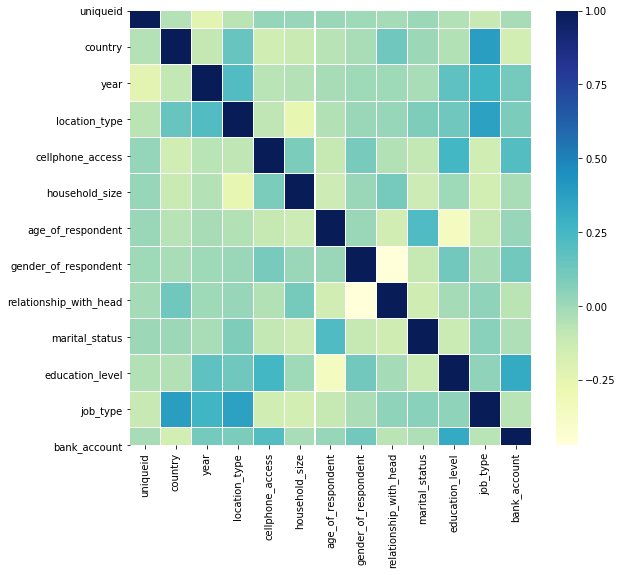

In [726]:
corrmat = train_data_corr.corr() 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [727]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X = train_data.iloc[:,:-1].values
y = train_data.iloc[:, -1].values

In [728]:
X #1,2,8,9,10,11

array([['uniqueid_1', 'Kenya', 2018, ..., 'Married/Living together',
        'Secondary education', 'Self employed'],
       ['uniqueid_2', 'Kenya', 2018, ..., 'Widowed',
        'No formal education', 'Government Dependent'],
       ['uniqueid_3', 'Kenya', 2018, ..., 'Single/Never Married',
        'Vocational/Specialised training', 'Self employed'],
       ...,
       ['uniqueid_2115', 'Uganda', 2018, ..., 'Widowed',
        'Primary education', 'Other Income'],
       ['uniqueid_2116', 'Uganda', 2018, ..., 'Divorced/Seperated',
        'Secondary education', 'Self employed'],
       ['uniqueid_2117', 'Uganda', 2018, ..., 'Single/Never Married',
        'Secondary education', 'No Income']], dtype=object)

In [729]:
X.shape

(23524, 12)

In [730]:
labelencoder_X1 = LabelEncoder()
X[:, 1] = labelencoder_X1.fit_transform(X[:, 1])
labelencoder_X2 = LabelEncoder()
X[:, 2] = labelencoder_X2.fit_transform(X[:, 2])
labelencoder_X3 = LabelEncoder()
X[:, 3] = labelencoder_X3.fit_transform(X[:, 3])
labelencoder_X4 = LabelEncoder()
X[:, 4] = labelencoder_X4.fit_transform(X[:, 4])
labelencoder_X7 = LabelEncoder()
X[:, 7] = labelencoder_X7.fit_transform(X[:, 7])
labelencoder_X8 = LabelEncoder()
X[:, 8] = labelencoder_X8.fit_transform(X[:, 8])
labelencoder_X9 = LabelEncoder()
X[:, 9] = labelencoder_X9.fit_transform(X[:, 9])
labelencoder_X10 = LabelEncoder()
X[:, 10] = labelencoder_X10.fit_transform(X[:, 10])
labelencoder_X11 = LabelEncoder()
X[:, 11] = labelencoder_X11.fit_transform(X[:, 11])
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)




In [731]:
X = X[:,1:]

In [732]:
from sklearn.preprocessing import OneHotEncoder
# One Hot encoding-->>
onehotencoder1 = OneHotEncoder(categorical_features = [0,1,7,8,9,10])
X = onehotencoder1.fit_transform(X).toarray()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [733]:
X.shape

(23524, 39)

In [734]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [735]:
'''from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X, y = sm.fit_sample(X, y.ravel())'''

'from imblearn.over_sampling import SMOTE\nsm = SMOTE(random_state=2)\nX, y = sm.fit_sample(X, y.ravel())'

In [736]:
X.shape

(23524, 39)

In [1]:
'''from sklearn import svm
from sklearn import linear_model
classifier = linear_model.SGDClassifier(max_iter=1000, tol=1e-3,  alpha=0.01)
classifier.fit(X, y)'''
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu', input_dim = 39))
classifier.add(Dropout(0.2))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 140, init = 'uniform',activation = 'relu'))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform',activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X, y, batch_size = 4, nb_epoch = 4, validation_split=0.05)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
'''y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)'''

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=39, units=64, kernel_initializer="uniform")`
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=140, kernel_initializer="uniform")`
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`


NameError: name 'X' is not defined

In [779]:
'''from keras.models import load_model

classifier.save('Classifier_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
classifier = load_model('Classifier_model.h5')'''

"from keras.models import load_model\n\nclassifier.save('Classifier_model.h5')  # creates a HDF5 file 'my_model.h5'\ndel model  # deletes the existing model\n\n# returns a compiled model\n# identical to the previous one\nclassifier = load_model('Classifier_model.h5')"

In [780]:
'''model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))'''

'model_json = classifier.to_json()\nwith open("model.json", "w") as json_file:\n    json_file.write(model_json)\n# serialize weights to HDF5\nclassifier.save_weights("model.h5")\nprint("Saved model to disk")\n\n# load json and create model\njson_file = open(\'model.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n# load weights into new model\nloaded_model.load_weights("model.h5")\nprint("Loaded model from disk")\n \n# evaluate loaded model on test data\nloaded_model.compile(loss=\'binary_crossentropy\', optimizer=\'rmsprop\', metrics=[\'accuracy\'])\nscore = loaded_model.evaluate(X, Y, verbose=0)\nprint("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))'

In [781]:
'''# serialize model to YAML
model_yaml = classifier.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))'''

'# serialize model to YAML\nmodel_yaml = classifier.to_yaml()\nwith open("model.yaml", "w") as yaml_file:\n    yaml_file.write(model_yaml)\n# serialize weights to HDF5\nclassifier.save_weights("model.h5")\nprint("Saved model to disk")\n \n# later...\n \n# load YAML and create model\nyaml_file = open(\'model.yaml\', \'r\')\nloaded_model_yaml = yaml_file.read()\nyaml_file.close()\nloaded_model = model_from_yaml(loaded_model_yaml)\n# load weights into new model\nloaded_model.load_weights("model.h5")\nprint("Loaded model from disk")\n \n# evaluate loaded model on test data\nloaded_model.compile(loss=\'binary_crossentropy\', optimizer=\'rmsprop\', metrics=[\'accuracy\'])\nscore = loaded_model.evaluate(X, Y, verbose=0)\nprint("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))'

In [833]:
test = pd.read_csv('test.csv')

In [834]:
test_columns = test.columns

In [835]:
test_columns_new = ['uniqueid', 'country', 'year', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']

In [836]:
test = test[test_columns_new]

In [837]:
X_test = test.iloc[:,:].values

In [838]:
X_test[:, 1] = labelencoder_X1.fit_transform(X_test[:, 1])
X_test[:, 2] = labelencoder_X2.fit_transform(X_test[:, 2])
X_test[:, 3] = labelencoder_X3.fit_transform(X_test[:, 3])
X_test[:, 4] = labelencoder_X4.fit_transform(X_test[:, 4])
X_test[:, 7] = labelencoder_X7.fit_transform(X_test[:, 7])
X_test[:, 8] = labelencoder_X8.fit_transform(X_test[:, 8])
X_test[:, 9] = labelencoder_X9.fit_transform(X_test[:, 9])
X_test[:, 10] = labelencoder_X10.fit_transform(X_test[:, 10])
X_test[:, 11] = labelencoder_X11.fit_transform(X_test[:, 11])

In [839]:
test_unique_ids = X_test[:,0]

In [840]:
X_test = X_test[:,1:]

In [841]:
# One Hot encoding-->>
X_test = onehotencoder1.fit_transform(X_test).toarray()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [842]:
X_test = sc.fit_transform(X_test)

In [843]:
predictions = classifier.predict(X_test)
#predictions = classifier.predict_classes(X_test)

In [844]:
for i in range(len(predictions)):
    predictions[i][0] = 0 if predictions[i][0]<=0.43 else 1
    

In [828]:
predictions

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [829]:
final_submission = pd.DataFrame(data={'uniqueid':test_unique_ids.reshape(10086,), 'bank_account':predictions.reshape(10086,)})

In [830]:
i=0
def addxcountry(x):
    global i
    #print(i)
    x = x + ' x ' + str(test.iloc[i,1])
    i+=1
    return x

In [831]:
final_submission['uniqueid'] = final_submission.uniqueid.map(addxcountry)

In [832]:
final_submission.to_csv('submission.csv', index=False)